Explore the Dataset: Load the dataset and perform exploratory data analysis (EDA) to understand its structure, features, and target variable.
Check for missing values and data types and visualize EDA.

Data Preprocessing:

Handle Missing Values: Impute or remove missing values as appropriate.
Data Encoding: Convert categorical variables into numerical values if required (e.g., one-hot encoding).
Data Splitting: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

Building the Decision Tree:

Model Implementation: Implement a decision tree classifier using a library such as Scikit-learn in Python.
Use the DecisionTreeClassifier class from Scikit-learn.
Fit the model on the training data.

Model Evaluation:

Make Predictions: Use the trained model to make predictions on the testing set.

Evaluate Performance: Assess the model’s performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Finidings:

Results: Present the results of the model evaluation with appropriate metrics and visualizations.

Conclusion: Summarize your findings and suggest possible improvements or future work.



This dataset simulates a scenario where you want to predict whether a customer will churn (leave) or stay with a company based on some features. (Numeric): Age of the customer. (Numeric): The amount of money spent by the customer per month. (Categorical): Type of contract the customer has ('Month-to-Month', 'One Year', 'Two Years'). (Numeric): Number of customer support calls made by the customer in the last month. (Target): Whether the customer churned or not (1 for churned, 0 for stayed).

Details about The steps
1. Data Preprocessing:

Convert the categorical variable Contract Type into numerical values using one-hot encoding or label encoding.
Normalize or standardize numerical features if needed.
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
2. Decision Tree Implementation:

Use a decision tree classifier to fit the model on the training data.
Evaluate the model on the testing set using metrics such as accuracy, precision, recall, and F1-score.

3. Analysis:

Discuss the impact of different contract types, age, and support calls on churn prediction.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Set default matplotlib style instead of seaborn
plt.style.use('default')

class ChurnAnalyzer:
    def __init__(self):
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = StandardScaler()

    def load_data(self, filepath):
        """Load and prepare the dataset"""
        try:
            self.data = pd.read_csv(filepath)
            print("\n1. Data Loading:")
            print(f"Dataset shape: {self.data.shape}")
            print("\nFirst few rows:")
            print(self.data.head())
            return True
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return False

    def explore_data(self):
        """Perform exploratory data analysis"""
        print("\n2. Exploratory Data Analysis:")

        # Data info
        print("\na. Data Info:")
        print(self.data.info())

        # Summary statistics
        print("\nb. Summary Statistics:")
        print(self.data.describe())

        # Check for missing values
        print("\nc. Missing Values:")
        print(self.data.isnull().sum())

        # Create visualizations
        self.create_eda_plots()

    def create_eda_plots(self):
        """Create EDA visualizations"""
        # 1. Age distribution by churn status
        plt.figure(figsize=(10, 6))
        for churn in [0, 1]:
            plt.hist(self.data[self.data['Churn'] == churn]['Age'],
                    alpha=0.5,
                    label=f'Churn = {churn}',
                    bins=30)
        plt.title('Age Distribution by Churn Status')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.legend()
        plt.show()

        # 2. Monthly spend vs. churn
        plt.figure(figsize=(10, 6))
        for churn in [0, 1]:
            plt.hist(self.data[self.data['Churn'] == churn]['Monthly Spend'],
                    alpha=0.5,
                    label=f'Churn = {churn}',
                    bins=30)
        plt.title('Monthly Spend Distribution by Churn Status')
        plt.xlabel('Monthly Spend')
        plt.ylabel('Count')
        plt.legend()
        plt.show()

        # 3. Support calls vs. churn
        plt.figure(figsize=(10, 6))
        plt.hist2d(self.data['Support Calls'],
                  self.data['Churn'],
                  bins=(10, 2))
        plt.colorbar(label='Count')
        plt.title('Support Calls vs. Churn')
        plt.xlabel('Support Calls')
        plt.ylabel('Churn')
        plt.show()

        # 4. Contract type analysis
        plt.figure(figsize=(10, 6))
        contract_counts = pd.DataFrame({
            'One Year': [self.data[(self.data['Contract Type_One Year']) & (self.data['Churn'] == c)].shape[0]
                        for c in [0, 1]],
            'Two Years': [self.data[(self.data['Contract Type_Two Years']) & (self.data['Churn'] == c)].shape[0]
                         for c in [0, 1]]
        }, index=['No Churn', 'Churned'])
        contract_counts.plot(kind='bar', stacked=True)
        plt.title('Contract Type Distribution by Churn Status')
        plt.xlabel('Churn Status')
        plt.ylabel('Count')
        plt.legend(title='Contract Type')
        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        """Preprocess the data for modeling"""
        print("\n3. Data Preprocessing:")

        # Separate features and target
        X = self.data.drop('Churn', axis=1)
        y = self.data['Churn']

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale the numerical features
        numerical_features = ['Age', 'Monthly Spend', 'Support Calls']
        self.X_train[numerical_features] = self.scaler.fit_transform(self.X_train[numerical_features])
        self.X_test[numerical_features] = self.scaler.transform(self.X_test[numerical_features])

        print("Data split into training and testing sets")
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Testing set shape: {self.X_test.shape}")

    def train_model(self):
        """Train the decision tree model"""
        print("\n4. Model Training:")

        # Initialize and train the model
        self.model = DecisionTreeClassifier(
            random_state=42,
            max_depth=5,  # Prevent overfitting
            min_samples_split=20,
            min_samples_leaf=10
        )
        self.model.fit(self.X_train, self.y_train)

        print("Decision Tree model trained successfully")

    def evaluate_model(self):
        """Evaluate the model's performance"""
        print("\n5. Model Evaluation:")

        # Make predictions
        y_pred = self.model.predict(self.X_test)

        # Calculate metrics
        print("\na. Classification Report:")
        print(classification_report(self.y_test, y_pred))

        # Create confusion matrix
        cm = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

        # Add numeric labels to the plot
        thresh = cm.max() / 2
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.show()

        # Feature importance
        feature_importance = pd.DataFrame({
            'Feature': self.X_train.columns,
            'Importance': self.model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_importance)), feature_importance['Importance'])
        plt.xticks(range(len(feature_importance)), feature_importance['Feature'], rotation=45)
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()

        return feature_importance

    def print_key_insights(self, feature_importance):
        """Print key insights from the analysis"""
        print("\n6. Key Insights:")

        # Churn rate
        churn_rate = (self.data['Churn'] == 1).mean() * 100
        print(f"\nOverall churn rate: {churn_rate:.1f}%")

        # Most important features
        print("\nTop 3 most important features for predicting churn:")
        for _, row in feature_importance.head(3).iterrows():
            print(f"- {row['Feature']}: {row['Importance']:.3f}")

        # Contract type analysis
        one_year_churn = self.data[self.data['Contract Type_One Year']]['Churn'].mean() * 100
        two_year_churn = self.data[self.data['Contract Type_Two Years']]['Churn'].mean() * 100
        print(f"\nChurn rate by contract type:")
        print(f"- One Year contract: {one_year_churn:.1f}%")
        print(f"- Two Year contract: {two_year_churn:.1f}%")

        # Support calls analysis
        high_support_churn = self.data[self.data['Support Calls'] > self.data['Support Calls'].mean()]['Churn'].mean() * 100
        low_support_churn = self.data[self.data['Support Calls'] <= self.data['Support Calls'].mean()]['Churn'].mean() * 100
        print(f"\nChurn rate by support calls:")
        print(f"- Above average support calls: {high_support_churn:.1f}%")
        print(f"- Below average support calls: {low_support_churn:.1f}%")

        print("\nRecommendations:")
        print("1. Focus on customers with high numbers of support calls")
        print("2. Encourage longer-term contracts")
        print("3. Monitor monthly spending patterns")
        print("4. Develop targeted retention strategies for high-risk segments")

# Execute the analysis
# def main():
#     # Initialize analyzer
#     analyzer = ChurnAnalyzer()

#     # Create sample data
#     analyzer.create_sample_data()

#     # Perform analysis steps
#     analyzer.explore_data()
#     analyzer.preprocess_data()
#     analyzer.train_model()
#     feature_importance = analyzer.evaluate_model()
#     analyzer.print_key_insights(feature_importance)

# if __name__ == "__main__":
#     main()

In [15]:
analyzer = ChurnAnalyzer()

In [16]:
analyzer.load_data('customer_churn_data.csv')




1. Data Loading:
Dataset shape: (1000, 6)

First few rows:
   Age  Monthly Spend  Support Calls  Churn  Contract Type_One Year  \
0   56            246              6      1                    True   
1   69            134              5      1                   False   
2   46             34              5      0                   False   
3   32            211              8      1                    True   
4   60            236              5      1                   False   

   Contract Type_Two Years  
0                    False  
1                     True  
2                    False  
3                    False  
4                    False  


True


2. Exploratory Data Analysis:

a. Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1000 non-null   int64
 1   Monthly Spend            1000 non-null   int64
 2   Support Calls            1000 non-null   int64
 3   Churn                    1000 non-null   int64
 4   Contract Type_One Year   1000 non-null   bool 
 5   Contract Type_Two Years  1000 non-null   bool 
dtypes: bool(2), int64(4)
memory usage: 33.3 KB
None

b. Summary Statistics:
              Age  Monthly Spend  Support Calls        Churn
count  1000.00000     1000.00000    1000.000000  1000.000000
mean     43.81900      133.46900       4.402000     0.376000
std      14.99103       67.73706       2.827081     0.484622
min      18.00000       20.00000       0.000000     0.000000
25%      31.00000       74.00000       2.000000    

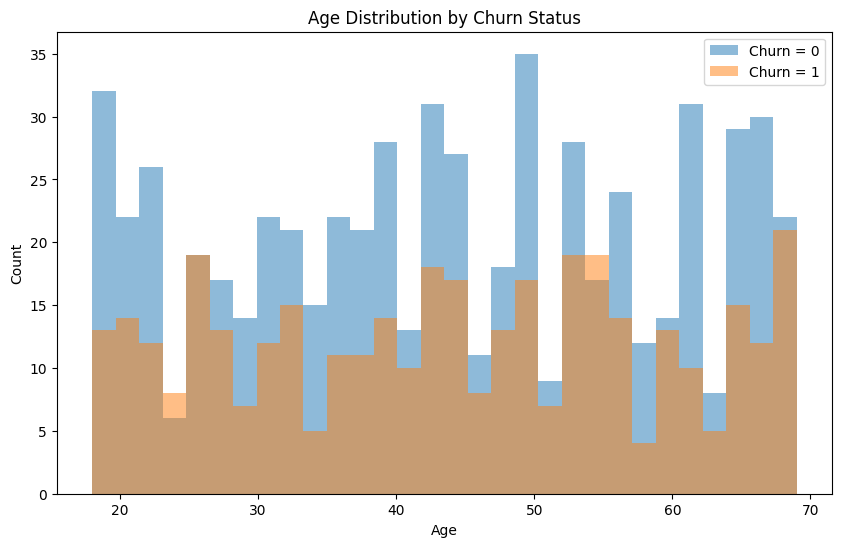

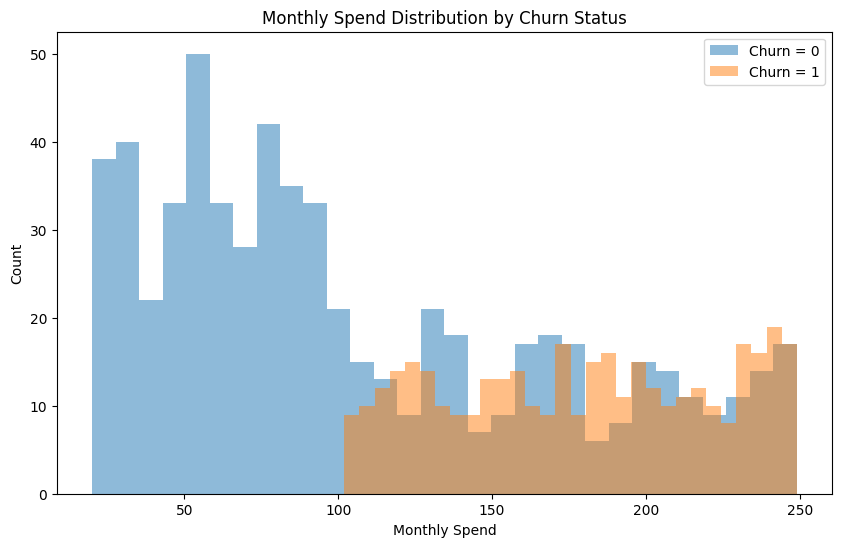

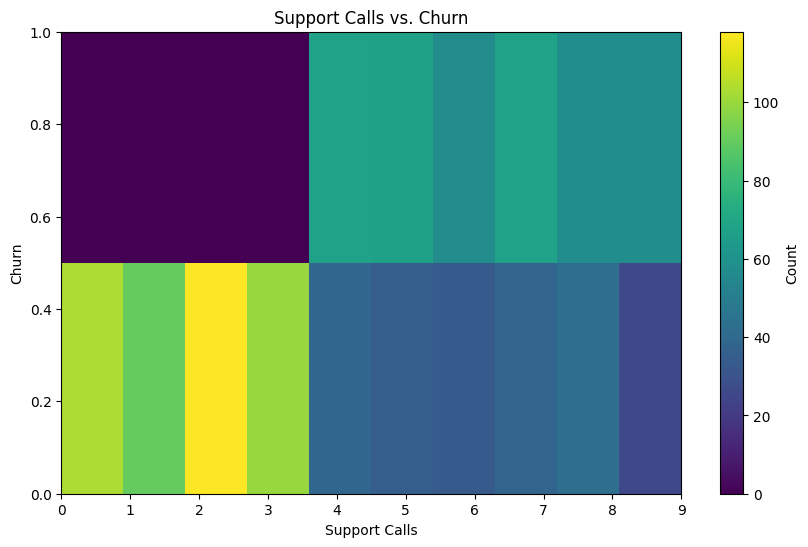

<Figure size 1000x600 with 0 Axes>

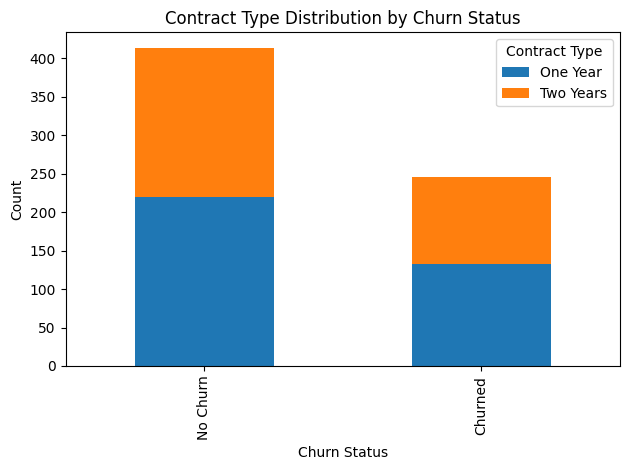

In [17]:
analyzer.explore_data()

In [18]:
analyzer.preprocess_data()


3. Data Preprocessing:
Data split into training and testing sets
Training set shape: (800, 5)
Testing set shape: (200, 5)


In [19]:
analyzer.train_model()
#     feature_importance = analyzer.evaluate_model()
#     analyzer.print_key_insights(feature_importance)


4. Model Training:
Decision Tree model trained successfully



5. Model Evaluation:

a. Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        74

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



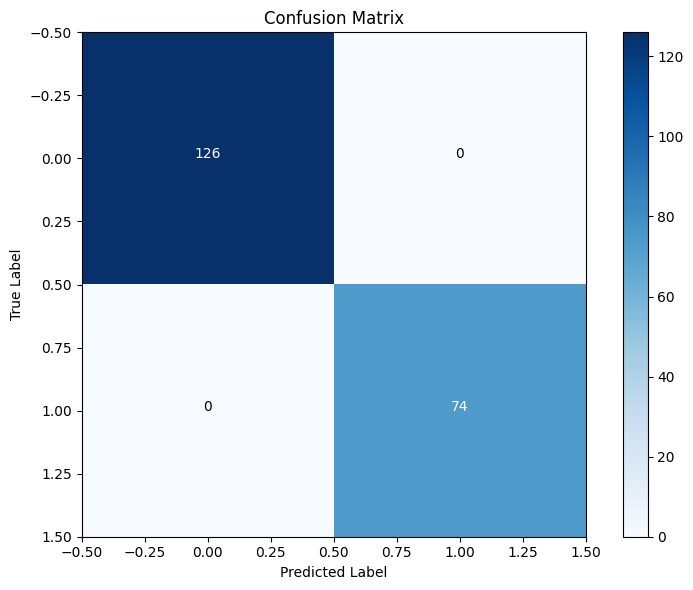

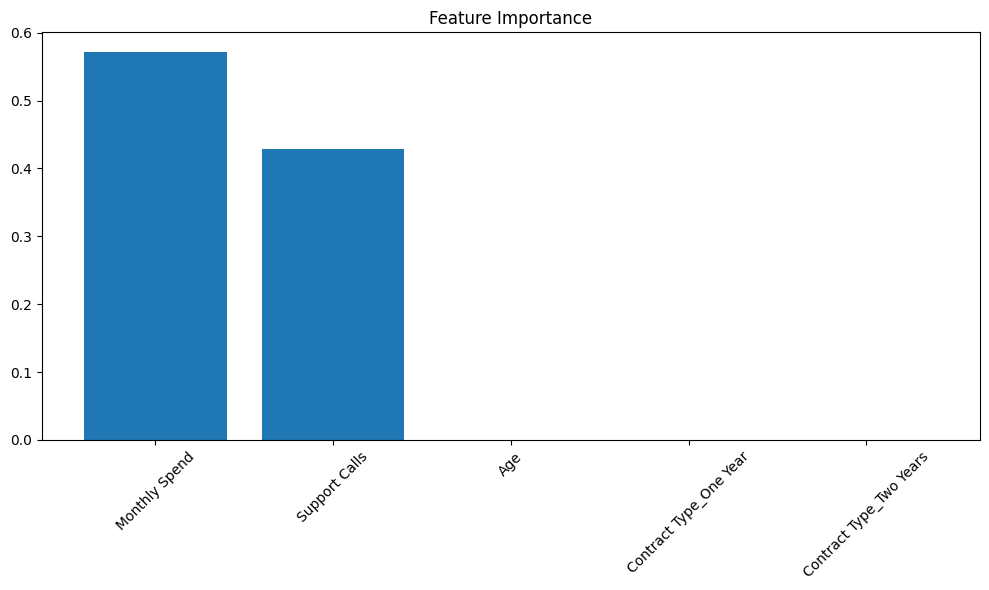

In [20]:
#     analyzer.train_model()
feature_importance = analyzer.evaluate_model()
#     analyzer.print_key_insights(feature_importance)

In [21]:
#     analyzer.train_model()
#     feature_importance = analyzer.evaluate_model()
analyzer.print_key_insights(feature_importance)


6. Key Insights:

Overall churn rate: 37.6%

Top 3 most important features for predicting churn:
- Monthly Spend: 0.572
- Support Calls: 0.428
- Age: 0.000

Churn rate by contract type:
- One Year contract: 37.5%
- Two Year contract: 36.9%

Churn rate by support calls:
- Above average support calls: 63.9%
- Below average support calls: 13.1%

Recommendations:
1. Focus on customers with high numbers of support calls
2. Encourage longer-term contracts
3. Monitor monthly spending patterns
4. Develop targeted retention strategies for high-risk segments
